In [ ]:
import warnings; 
warnings.simplefilter('ignore')

In [ ]:
!pip install pandas
!pip install prophet

# 0. Install and import dependencies

In [ ]:
import pandas as pd
from prophet import Prophet

# 1.Read and process data

In [ ]:
df = pd.read_csv('/content/picchi_peaks.csv')
df.head()

,FLOW_DATE,y
0,1/1/2011,46.42
1,1/2/2011,46.54
2,1/3/2011,46.64
3,1/4/2011,46.69
4,1/5/2011,46.70


In [ ]:
df['Year'] = df['FLOW_DATE'].apply(lambda x: str(x)[-4:])
df['Month'] = df['FLOW_DATE'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['FLOW_DATE'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Day']+'-'+df['Year'])
df.head()

,FLOW_DATE,y,Year,Month,Day,ds
0,1/1/2011,46.42,2011,1/,1/,2011-01-01
1,1/2/2011,46.54,2011,2/,1/,2011-01-01
2,1/3/2011,46.64,2011,3/,1/,2011-01-01
3,1/4/2011,46.69,2011,4/,1/,2011-01-01
4,1/5/2011,46.70,2011,5/,1/,2011-01-01


In [ ]:
df.drop(['FLOW_DATE', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.head()

,y,ds
0,46.42,2011-01-01
1,46.54,2011-01-01
2,46.64,2011-01-01
3,46.69,2011-01-01
4,46.70,2011-01-01


# 2.Train the model

In [ ]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

# 3.Forecasting the data

In [ ]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-03,46.058854,44.616299,69.664200,46.058854,46.058854,11.620017,11.620017,11.620017,1.036155,1.036155,1.036155,0.193177,0.193177,0.193177,10.390685,10.390685,10.390685,0.0,0.0,0.0,57.678871
1,2010-12-03,42.335766,36.218953,61.899787,42.335766,42.335766,7.113038,7.113038,7.113038,1.036155,1.036155,1.036155,0.193177,0.193177,0.193177,5.883706,5.883706,5.883706,0.0,0.0,0.0,49.448804
2,2011-01-01,41.149287,33.726838,58.464029,41.149287,41.149287,4.769734,4.769734,4.769734,1.036155,1.036155,1.036155,0.076082,0.076082,0.076082,3.657498,3.657498,3.657498,0.0,0.0,0.0,45.919021
3,2011-01-02,41.108374,33.839207,59.367907,41.108374,41.108374,4.555793,4.555793,4.555793,1.036155,1.036155,1.036155,0.305051,0.305051,0.305051,3.214588,3.214588,3.214588,0.0,0.0,0.0,45.664167
4,2011-01-03,41.067461,32.837830,57.587603,41.067461,41.067461,4.011792,4.011792,4.011792,1.036155,1.036155,1.036155,0.351497,0.351497,0.351497,2.624141,2.624141,2.624141,0.0,0.0,0.0,45.079253


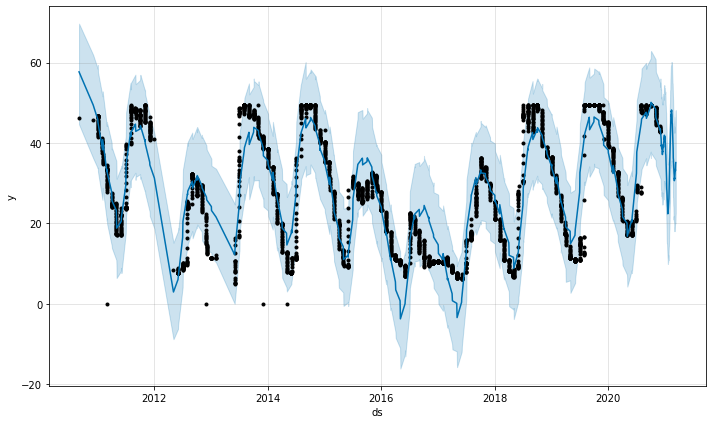

In [ ]:
plot1 = m.plot(forecast)

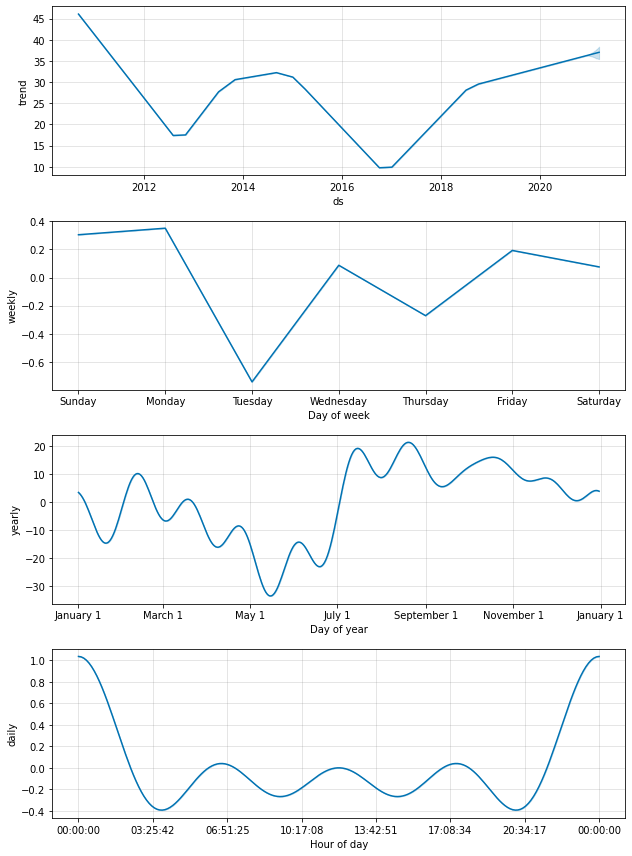

In [ ]:
plt2 = m.plot_components(forecast)

# 4. Saturating Forecasts

## 4.1 Saturating Minimum
### The logistic growth model can also handle a saturating minimum, which is specified with a column floor in the same way as the cap column specifies the maximum

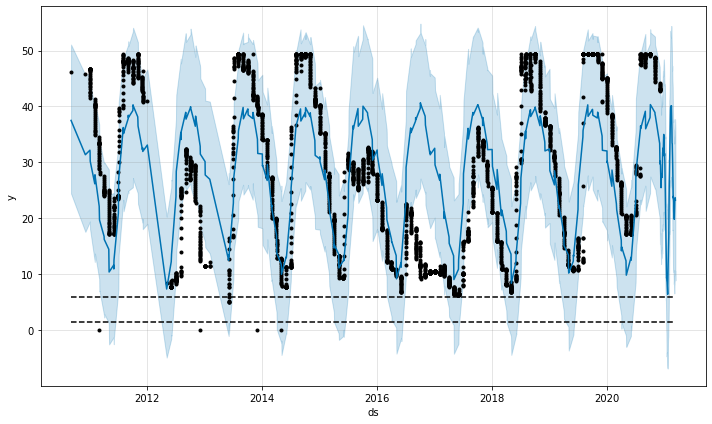

In [ ]:
df['y'] = 10 - df['y']
df['cap'] = 6
df['floor'] = 1.5
future['cap'] = 6
future['floor'] = 1.5
m = Prophet(growth='logistic', daily_seasonality=True)
m.fit(df)
fcst = m.predict(future)
fig = m.plot(fcst)

## 4.2 Forecasting Growth
### When forecasting growth, there is usually some maximum achievable point: total market size, total population size, etc. This is called the carrying capacity, and the forecast should saturate at this point.

In [ ]:
df['cap'] = 46.42

In [ ]:
m = Prophet(growth='logistic')
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


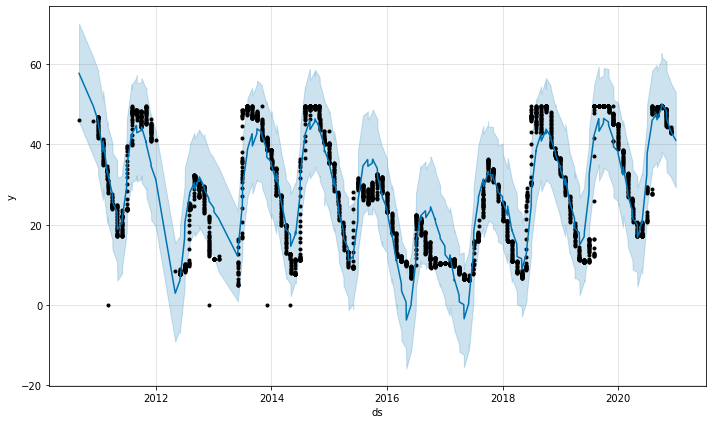

In [ ]:
#create 12 months of future data
future_data = model.make_future_dataframe(periods=1, freq = 'y')
future['cap'] = 46.42
future['floor'] = 46.42
#forecast the data for future data
future = model.predict(future_data)
fig = model.plot(future)

# 5. Trend Changepoints

## 5.1 Automatic changepoint detection in Prophet
### Prophet detects changepoints by first specifying a large number of potential changepoints at which the rate is allowed to change. It then puts a sparse prior on the magnitudes of the rate changes (equivalent to L1 regularization)

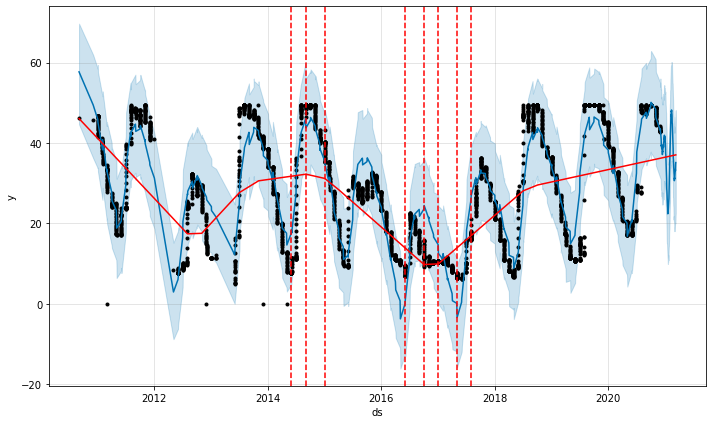

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

## 5.2 Adjusting trend flexibility
### If the trend changes are being overfit (too much flexibility) or underfit (not enough flexibility), you can adjust the strength of the sparse prior using the input argument changepoint_prior_scale.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


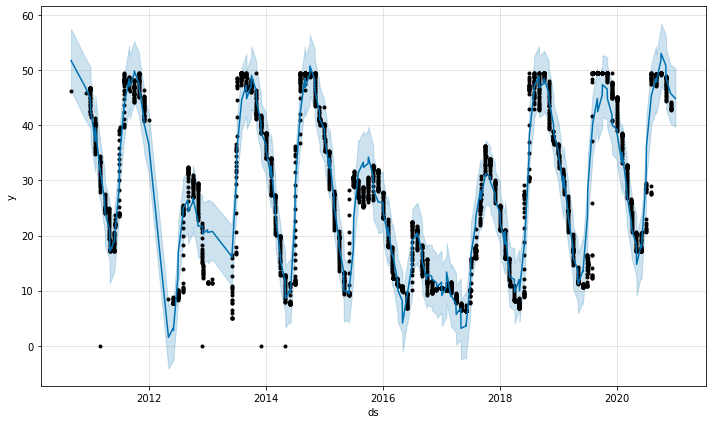

In [ ]:
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)

## 5.3 Specifying the locations of the changepoints
### If you wish, rather than using automatic changepoint detection you can manually specify the locations of potential changepoints with the changepoints argument. Slope changes will then be allowed only at these points, with the same sparse regularization as before. One could, for instance, create a grid of points as is done automatically, but then augment that grid with some specific dates that are known to be likely to have changes.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


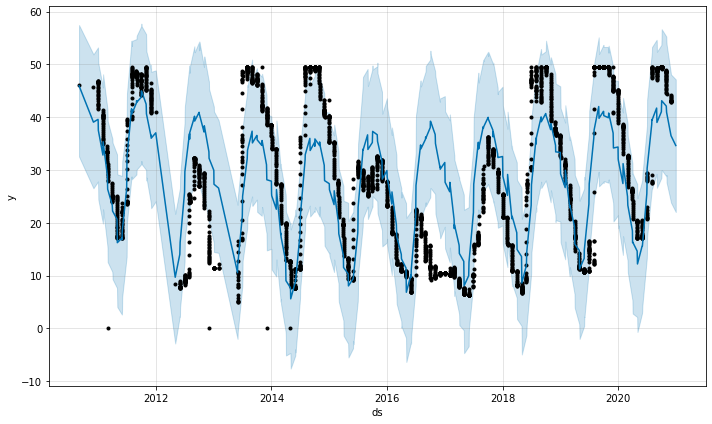

In [ ]:
m = Prophet(changepoints=['03-01-2014'])
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)